### Assignment 5 classification

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# visualize func
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn import metrics

import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

def visualize_tree(tree, name):
    """StringIO(): creates an object (empty in this case) to receive a string buffer (the tree will be created first as a string before as an image) in DOT (graph description language) format."""
    dot_data = StringIO()
    """export_graphviz(): exports the tree in DOT format, generating a representation of the decision tree, which is written into the ‘out_file’."""
    export_graphviz(tree, out_file = dot_data)
    """graph_from_dot_data(): will use the DOT object to create the graph."""
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png("./"+ name +".png")
    Image(graph.create_png())


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("./data/diabetes.csv", header=None, names=col_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree = []
pred = []

tree1 = DecisionTreeClassifier()
tree1 = tree1.fit(X_train,y_train)
pred1 = tree1.predict(X_test)
print("Dicision tree Accuracy:",metrics.accuracy_score(y_test, pred1))
visualize_tree(tree1, "diabetes")

Dicision tree Accuracy: 0.6796536796536796


In [4]:
tree2 = DecisionTreeClassifier(criterion='gini', max_depth = 7)
tree2.fit(X_train, y_train)
pred2 = tree2.predict(X_test)
print('Dicision tree, Criterion = gini Accuracy:', accuracy_score(y_test, pred2))
visualize_tree(tree2, "gini")
print(metrics.classification_report(pred2, y_test))

Dicision tree, Criterion = gini Accuracy: 0.7186147186147186
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       167
           1       0.49      0.66      0.56        64

   micro avg       0.72      0.72      0.72       231
   macro avg       0.67      0.70      0.68       231
weighted avg       0.75      0.72      0.73       231



In [5]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth = 7, splitter='random')
tree3.fit(X_train, y_train)
pred3 = tree3.predict(X_test)
print('Dicision tree, Criterion = entropy Accuracy:', accuracy_score(y_test, pred3))
visualize_tree(tree3, "entropy")
print(metrics.classification_report(pred3, y_test))

Dicision tree, Criterion = entropy Accuracy: 0.7575757575757576
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       184
           1       0.45      0.81      0.58        47

   micro avg       0.76      0.76      0.76       231
   macro avg       0.69      0.78      0.70       231
weighted avg       0.84      0.76      0.78       231



In [6]:
Rtree = RandomForestClassifier(criterion = 'entropy', max_depth=4, random_state=0)
Rtree.fit(X_train, y_train)
Rpred = Rtree.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, Rpred))
print(metrics.classification_report(Rpred, y_test))

Random Forest Accuracy: 0.7835497835497836
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       158
           1       0.64      0.74      0.68        73

   micro avg       0.78      0.78      0.78       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.80      0.78      0.79       231



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
from sklearn.metrics import confusion_matrix

# confusion matrix need type list as input 
y_test_list = y_test.tolist() 

pred_list = []
pred_list.append(pred1.tolist())
pred_list.append(pred2.tolist())
pred_list.append(pred3.tolist())
pred_list.append(Rpred.tolist())

In [8]:
for i in range(4):
    tn, fp, fn, tp = confusion_matrix(y_test_list, pred_list[i]).ravel() # binary case
    if(i==0): print("Original decision tree:")
    elif(i==1): print("Gini decision tree:")
    elif(i==2): print("Entropy decision tree:")
    else: print("Random forest:")
    print("TP:", tp, "TN:",tn, "FP:",fp,"FN:" ,fn)

Original decision tree:
TP: 42 TN: 115 FP: 31 FN: 43
Gini decision tree:
TP: 42 TN: 124 FP: 22 FN: 43
Entropy decision tree:
TP: 38 TN: 137 FP: 9 FN: 47
Random forest:
TP: 54 TN: 127 FP: 19 FN: 31


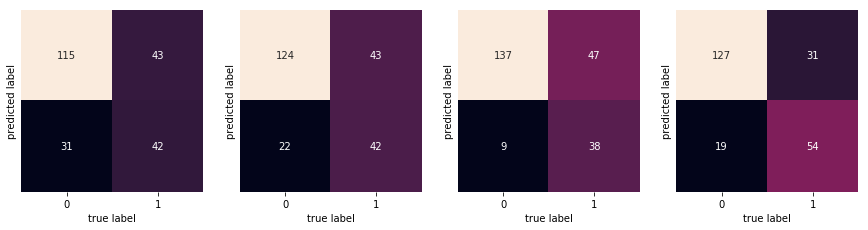

In [9]:
import seaborn  as sns
import matplotlib.pyplot as plt

ax = []
f, ax = plt.subplots(1,4, figsize = (15,10))

for i in range(4):
    g1 = sns.heatmap(confusion_matrix(y_test_list, pred_list[i]).T, square=True, annot=True, fmt='d', cbar=False,ax=ax[i])
    g1.set_ylabel('predicted label')
    g1.set_xlabel('true label')
    g1.set_yticks([])

plt.show()

In [55]:
print(type(data))

pos = pd.DataFrame()
neg = pd.DataFrame()

for index, row in data.iterrows():
    if row['label'] == 1:
        pos.append(row)
    else:
        neg.append(row)

print(print(pos))

<class 'pandas.core.frame.DataFrame'>
pregnant      6.000
glucose     148.000
bp           72.000
skin         35.000
insulin       0.000
bmi          33.600
pedigree      0.627
age          50.000
label         1.000
Name: 0, dtype: float64
pregnant      8.000
glucose     183.000
bp           64.000
skin          0.000
insulin       0.000
bmi          23.300
pedigree      0.672
age          32.000
label         1.000
Name: 2, dtype: float64
pregnant      0.000
glucose     137.000
bp           40.000
skin         35.000
insulin     168.000
bmi          43.100
pedigree      2.288
age          33.000
label         1.000
Name: 4, dtype: float64
pregnant     3.000
glucose     78.000
bp          50.000
skin        32.000
insulin     88.000
bmi         31.000
pedigree     0.248
age         26.000
label        1.000
Name: 6, dtype: float64
pregnant      2.000
glucose     197.000
bp           70.000
skin         45.000
insulin     543.000
bmi          30.500
pedigree      0.158
age          53

pregnant      8.000
glucose     179.000
bp           72.000
skin         42.000
insulin     130.000
bmi          32.700
pedigree      0.719
age          36.000
label         1.000
Name: 175, dtype: float64
pregnant      0.000
glucose     129.000
bp          110.000
skin         46.000
insulin     130.000
bmi          67.100
pedigree      0.319
age          26.000
label         1.000
Name: 177, dtype: float64
pregnant      5.000
glucose     130.000
bp           82.000
skin          0.000
insulin       0.000
bmi          39.100
pedigree      0.956
age          37.000
label         1.000
Name: 179, dtype: float64
pregnant      7.000
glucose     194.000
bp           68.000
skin         28.000
insulin       0.000
bmi          35.900
pedigree      0.745
age          41.000
label         1.000
Name: 185, dtype: float64
pregnant      8.000
glucose     181.000
bp           68.000
skin         36.000
insulin     495.000
bmi          30.100
pedigree      0.615
age          60.000
label         1.

Name: 319, dtype: float64
pregnant      3.000
glucose     112.000
bp           74.000
skin         30.000
insulin       0.000
bmi          31.600
pedigree      0.197
age          25.000
label         1.000
Name: 321, dtype: float64
pregnant      0.000
glucose     124.000
bp           70.000
skin         20.000
insulin       0.000
bmi          27.400
pedigree      0.254
age          36.000
label         1.000
Name: 322, dtype: float64
pregnant     13.000
glucose     152.000
bp           90.000
skin         33.000
insulin      29.000
bmi          26.800
pedigree      0.731
age          43.000
label         1.000
Name: 323, dtype: float64
pregnant      1.000
glucose     122.000
bp           64.000
skin         32.000
insulin     156.000
bmi          35.100
pedigree      0.692
age          30.000
label         1.000
Name: 326, dtype: float64
pregnant      2.000
glucose     102.000
bp           86.000
skin         36.000
insulin     120.000
bmi          45.500
pedigree      0.127
age       

pregnant     14.000
glucose     175.000
bp           62.000
skin         30.000
insulin       0.000
bmi          33.600
pedigree      0.212
age          38.000
label         1.000
Name: 455, dtype: float64
pregnant     10.000
glucose     148.000
bp           84.000
skin         48.000
insulin     237.000
bmi          37.600
pedigree      1.001
age          51.000
label         1.000
Name: 458, dtype: float64
pregnant      8.000
glucose     120.000
bp            0.000
skin          0.000
insulin       0.000
bmi          30.000
pedigree      0.183
age          38.000
label         1.000
Name: 468, dtype: float64
pregnant      2.000
glucose     105.000
bp           80.000
skin         45.000
insulin     191.000
bmi          33.700
pedigree      0.711
age          29.000
label         1.000
Name: 476, dtype: float64
pregnant      3.000
glucose     158.000
bp           70.000
skin         30.000
insulin     328.000
bmi          35.500
pedigree      0.344
age          35.000
label         1.

pregnant     10.000
glucose     111.000
bp           70.000
skin         27.000
insulin       0.000
bmi          27.500
pedigree      0.141
age          40.000
label         1.000
Name: 667, dtype: float64
pregnant      6.000
glucose     195.000
bp           70.000
skin          0.000
insulin       0.000
bmi          30.900
pedigree      0.328
age          31.000
label         1.000
Name: 675, dtype: float64
pregnant      9.00
glucose     156.00
bp           86.00
skin          0.00
insulin       0.00
bmi          24.80
pedigree      0.23
age          53.00
label         1.00
Name: 676, dtype: float64
pregnant      3.000
glucose     121.000
bp           52.000
skin          0.000
insulin       0.000
bmi          36.000
pedigree      0.127
age          25.000
label         1.000
Name: 678, dtype: float64
pregnant      0.000
glucose     162.000
bp           76.000
skin         36.000
insulin       0.000
bmi          49.600
pedigree      0.364
age          26.000
label         1.000
Name:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

In [33]:
y_test = pd.DataFrame(y_test)
# need to transform y_test label into one hot encoding
onehotencoder = OneHotEncoder(categorical_features = [0])
ohe_data = onehotencoder.fit_transform(y_test).toarray() 
ohe_data = np.array(ohe_data)


def plot_ROC(y_score, title):

    n_classes = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ohe_data[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(ohe_data.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw = 2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


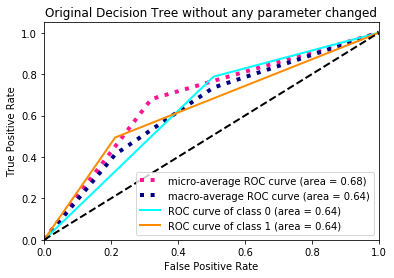

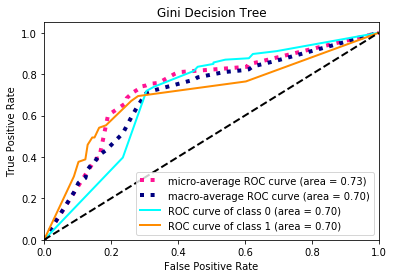

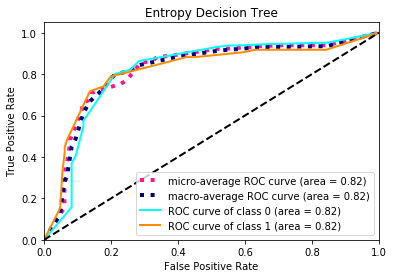

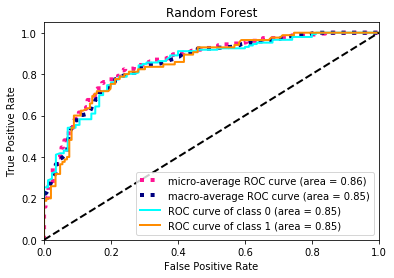

In [35]:
plot_ROC(tree1.predict_proba(X_test), "Original Decision Tree without any parameter changed")
plot_ROC(tree2.predict_proba(X_test), "Gini Decision Tree")
plot_ROC(tree3.predict_proba(X_test), "Entropy Decision Tree")
plot_ROC(Rtree.predict_proba(X_test), "Random Forest")